## ЛШ ЛТ
### <p>Задание 2
<p> 
<p> Часть 1
<p> импортируем библиотеки

In [64]:
import pandas as pd
import torch
from matplotlib import pyplot as plt

создание тензоров

In [65]:
A_tensor = torch.IntTensor(2, 3, 4)
B_tensor = torch.FloatTensor(5, 9)
C_tensor = torch.FloatTensor(12,)
D_tensor = B_tensor.view(3, 3, 5)
print(D_tensor)

tensor([[[-2.5429e-12,  7.1746e-43, -2.5434e-12,  7.1746e-43,  0.0000e+00],
         [ 0.0000e+00, -1.4578e-15,  7.1746e-43, -2.5430e-12,  7.1746e-43],
         [-2.5432e-12,  7.1746e-43,  9.9184e-39,  8.7245e-39, -2.5437e-12]],

        [[ 7.1746e-43,  9.9184e-39,  8.4490e-39, -2.5434e-12,  7.1746e-43],
         [-2.5432e-12,  7.1746e-43, -1.4578e-15,  7.1746e-43, -2.5433e-12],
         [ 7.1746e-43, -2.5434e-12,  7.1746e-43, -2.5431e-12,  7.1746e-43]],

        [[-2.5432e-12,  7.1746e-43, -1.4578e-15,  7.1746e-43, -6.7736e-10],
         [ 7.1746e-43,  6.7655e-42,  4.1338e-43,  6.6982e-42,  4.0498e-43],
         [-6.7740e-10,  7.1746e-43,  6.8608e-42,  2.8586e-43,  6.8608e-42]]])


<p> Часть 2
<p> Подключем датасет и инициализируем нейрон

In [66]:
data = pd.read_csv("dataset.csv", encoding="utf-8")
X = data.iloc[:, :2].values[:]
Y = data["target"].values.reshape((-1, 1))[:]
n_of_features = X.shape[1]

In [67]:
def learn(X, Y, learning_rate, number_of_epochs):
    neuron = torch.nn.Sequential(torch.nn.Linear(n_of_features, out_features=1), torch.nn.Sigmoid())
    neuron(torch.autograd.Variable(torch.FloatTensor([1, 1])))

    X = torch.autograd.Variable(torch.FloatTensor(X))
    Y = torch.autograd.Variable(torch.FloatTensor(Y))
    loss_list = []
    iter_list = []

    loss_func = torch.nn.SmoothL1Loss()
    optimizer = torch.optim.Adamax(neuron.parameters(), lr=learning_rate)
    # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
    for i in range(number_of_epochs):
        Y_hat = neuron(X)

        loss = loss_func(Y_hat, Y)
        loss_list.append(loss.data)
        iter_list.append(i)
        if i % (number_of_epochs/10) == 9999:
            print(f'Iter: {i} -> Loss: {loss.data}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    prob_pred = neuron(X)
    y_predicted = prob_pred > 0.5
    y_predicted = y_predicted.data.numpy().reshape(-1)
    print(y_predicted)
    plt.figure(figsize=(10, 8))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_predicted, cmap='brg')
    plt.title('Гавиал и крокодил', fontsize=15)
    plt.xlabel('Тон окраски', fontsize=14)
    plt.ylabel('Ширина мордочки', fontsize=14)
    plt.show()
    return loss_list

Данная функция выполняет инициализацию нейрона 
и одновременное обучение и вывод диаграммы рассеяния с меткой True или False

In [68]:
def plot_loss(lossess):
    plt.figure(figsize=(10, 8))
    plt.plot(lossess, color="m")
    plt.title('График потерь', fontsize=15)
    plt.xlabel('Количество итераций', fontsize=14)
    plt.ylabel('Функция потерь', fontsize=14)
    plt.show()

Как можно видеть на графике, кривая асимптотически приближается к нулю.

Ниже приведен график потерь с использованием функции потерь MSE и SGD
<p><img src="myplot.png">
<p> Ниже приведен график потерь с использованием функции потерь L1loss и SGD
<p><img src="myplot_2.png">
<p> Ниже приведен график потерь с использованием функции потерь Binary Cross Entropy Loss и SGD
<p><img src="myplot_binary.png">
<p> Ниже приведен график потерь с использованием функции потерь SmoothL1Loss и SGD
<p><img src="myplot_3.png">
<p>
Данная функция потерь имеет самые низкие показатели потерь (0.0258). Следует подобрать
другую оптимизацизационную функцию. 
<p>
Будет использована функция Adam. С её использованием 99999 итерация имеет потери 2.52e-05.
<p><img src="myplot_adam.png">
<p>Однако, существует улучшенная версия этой функции (Adamax), которую я применю ниже

Данная функция строит график зависимости потерь от итераций

Iter: 9999 -> Loss: 0.0019919828046113253
Iter: 19999 -> Loss: 0.0006673302268609405
Iter: 29999 -> Loss: 0.0003977062297053635
Iter: 39999 -> Loss: 0.0002534544619265944
Iter: 49999 -> Loss: 0.00015985581558197737
Iter: 59999 -> Loss: 0.00010003744682762772
Iter: 69999 -> Loss: 6.247236888157204e-05
Iter: 79999 -> Loss: 3.914178523700684e-05
Iter: 89999 -> Loss: 2.4728922653594054e-05
Iter: 99999 -> Loss: 1.5862535292399116e-05
[ True  True  True ...  True False False]


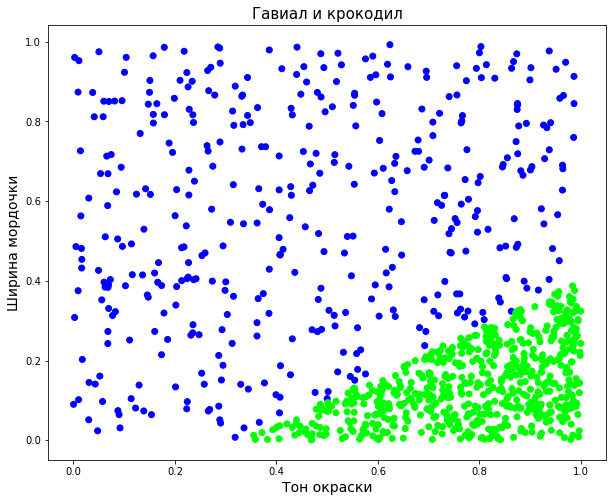

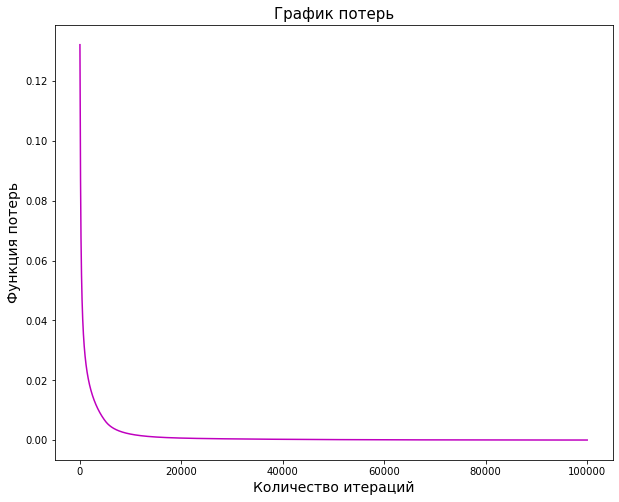

In [69]:
first_neuron = learn(X, Y, 0.01, 100000)
plot_loss(first_neuron)

Самый низкий показатель потерь (1.59e-05) был достигнут при текущих параметрах (Adamax, SmoothL1)